In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker

out_prefix = 'Example_CRP'

In [2]:
in_file = 'crp_sites.fasta'
with open(in_file, 'r') as f:
    text = f.read()
    lines = text.split('\n')
    seqs = [l.strip().upper() for l in lines if '#' not in l and '>' not in l and len(l.strip())>0]
    
print('We have %d WW domain seqs'%len(seqs))

# Convert seuqenes to weight matrix
weight_df = logomaker.alignment_to_matrix(seqs, to_type='weight', center_weights=True)

# preview weight matrix
weight_df.head()

We have 358 WW domain seqs


,A,C,G,T
pos,,,,
0,0.622079,-0.399616,-0.254186,0.031723
1,0.859060,-0.795804,-0.467750,0.404494
2,1.274899,-1.353918,-0.823403,0.902422
3,1.206839,-1.301502,-0.700051,0.794714
4,0.755913,-0.786614,-0.725213,0.755913


Done! Output written to Example_CRP.pdf.


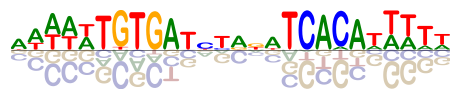

In [3]:
fig, ax = plt.subplots(figsize=[6.5,1.5])

# Create counts matrix
logo = logomaker.Logo(weight_df, 
                      ax=ax, 
                      center_values=False, 
                      fade_below=.7,
                      shade_below=.5,
                      font_name='Arial Rounded MT Bold')

# Style axes
logo.style_spines(visible=False)
ax.set_xticks([])
ax.set_yticks([])

# Tight layout
plt.tight_layout()

# Save as pdf
out_file = out_prefix+'.pdf'
fig.savefig(out_file)
print('Done! Output written to %s.'%out_file)

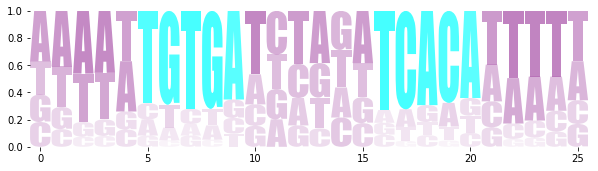

In [12]:
prob_df = logomaker.alignment_to_matrix(seqs, to_type='probability')

logo = logomaker.Logo(prob_df, 
                      color_scheme='purple',
                      fade_probabilities=True, 
                      show_spines=False, 
                      font_name='Impact')
logo.style_xticks(anchor = 7, spacing = 5)
logo.style_glyphs_in_sequence('.....TGTGA......TCACA.....', 
                              color='cyan')

In [5]:
x = .5
0 <= x <= 1

True

In [6]:
logomaker.list_color_schemes()

,color_scheme,characters
0,classic,ACGTU
1,grays,ACGTU
2,base_pairing,ACGTU
3,hydrophobicity,ACDEFGHIKLMNPQRSTVWY
4,chemistry,ACDEFGHIKLMNPQRSTVWY
5,charge,ACDEFGHIKLMNPQRSTVWY
6,NajafabadiEtAl2017,ACDEFGHIKLMNPQRSTVWY


In [7]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [8]:
from matplotlib.axes._subplots import Axes
isinstance(ax, Axes)

True

True

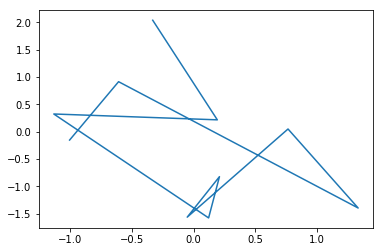

In [9]:
xs = np.random.randn(10)
ys = np.random.randn(10)
plt.plot(xs,ys)

ax = plt.gca()
isinstance(ax, Axes)

In [10]:
from matplotlib.axes import Axes
isinstance(ax, Axes)

True